In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
import cv2

# Random rotation matrix
def randR():
    return Rotation.from_euler('xyz', [np.random.randint(0, 360), np.random.randint(0, 360), np.random.randint(0, 360)], degrees=True).as_matrix()

# Random translation matrix
def randt(L): # Confined in a cube with an edge of length L
    return np.array([[2*L*np.random.random_sample()-L] for _ in range(3)])

def plot_camera_and_points(R, t, points):
    # Coordenadas dos eixos da câmera
    camera_axes = np.array([[0, 0, 0],
                            [1, 0, 0],
                            [0, 1, 0],
                            [0, 0, 1]])

    # Aplicar a transformação da câmera para obter as novas coordenadas dos eixos
    transformed_axes = np.dot(R, camera_axes.T).T + t

    # Criar a figura
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotar a origem do sistema de coordenadas inercial
    ax.scatter(0, 0, 0, c='b', marker='o', label='Origem (Inercial)')

    # Plotar as coordenadas da câmera
    ax.scatter(t[0], t[1], t[2], c='r', marker='o', label='Câmera')

    # Plotar os eixos da câmera
    for i in range(1, 4):
        ax.plot([t[0], transformed_axes[i, 0]],
                [t[1], transformed_axes[i, 1]],
                [t[2], transformed_axes[i, 2]], c=['r', 'g', 'b'][i-1])

    # Plotar os pontos no sistema inercial
    points = np.array(points)
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='g', marker='o', label='Pontos (Inercial)')

    # Configurar os rótulos dos eixos
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.set_zlabel('Eixo Z')

    # Configurar a legenda
    ax.legend()

    # Mostrar o gráfico

    plt.show()


def plot_image_points(image_points):
    """
    Plota os pontos 2D na imagem.

    :param image_points: Array de pontos 2D projetados na imagem.
    """

    if image_points.shape[1] != 2:
        raise ValueError("A matriz de image_points deve ter duas colunas (X e Y).")
    plt.figure(figsize=(8, 6))
    plt.scatter(image_points[:, 0], image_points[:, 1], c='b', marker='o', label='Pontos Projetados')
    plt.xlabel('Coordenada X na Imagem')
    plt.ylabel('Coordenada Y na Imagem')
    plt.title('Pontos 2D Projetados na Imagem')
    plt.grid()
    plt.legend()
    plt.show()


    

In [72]:
# Coordenadas dos eixos da câmera
camera_axes = np.array([[0, 0, 0],  # Origem 
                        [1, 0, 0],  # Eixo X
                        [0, 1, 0],  # Eixo Y
                        [0, 0, 1]]) # Eixo Z

# Matriz de rotação (3x3)
R = randR()

# Vetor de translação (3x1)
t = randt(3)

print(R)
print(t)

num_points = 20
world_points = np.random.rand(num_points, 3) 

t_new = []

for i in range(3):
    ti = t[i]
    t_new.append(ti[0])

t_new

[[-1.80411242e-16 -6.56059029e-01 -7.54709580e-01]
 [ 5.55111512e-17 -7.54709580e-01  6.56059029e-01]
 [-1.00000000e+00  5.55111512e-17  2.08166817e-16]]
[[1.11440831]
 [1.07502606]
 [0.16929288]]


[1.1144083051119678, 1.0750260586736804, 0.16929287759429945]

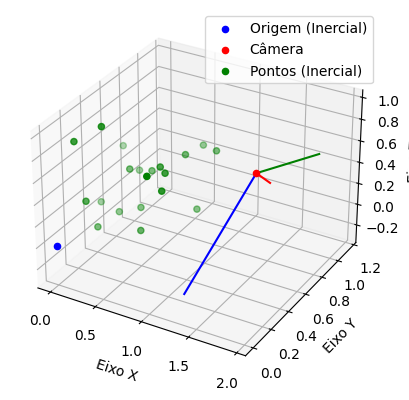

In [133]:
t = np.array(t_new)

plot_camera_and_points(R, t, world_points)


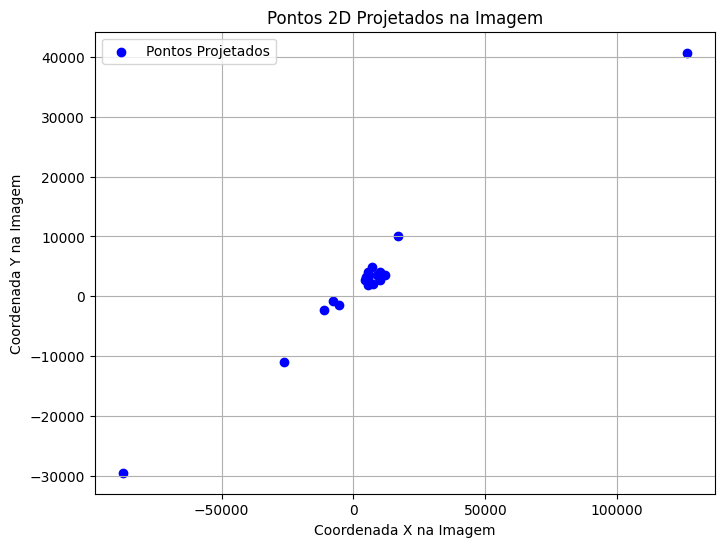

[[ -5300.20908923  -1516.79625928]
 [  5587.68442457   1926.07146299]
 [ 12038.11322244   3555.46886934]
 [-87384.06275823 -29454.18252   ]
 [ 17023.76115717  10044.53502298]
 [  5528.95892133   2392.25206223]
 [  5569.79799746   3050.96770838]
 [ -7879.49978405   -781.87770509]
 [-26468.91006486 -10947.052837  ]
 [  7008.131659     4906.7829545 ]
 [  5456.24051995   4102.25480959]
 [  4469.93941523   2788.33691061]
 [-11039.4710143   -2320.18821981]
 [  4905.6800923    3169.11479347]
 [  5668.7471211    3360.54828077]
 [  8821.4360764    3480.78963669]
 [126295.47228372  40672.14689947]
 [  7328.9675921    2075.39975143]
 [ 10079.05882801   3996.11654531]
 [ 10125.91084182   2794.53782865]]


In [134]:
# Criação de uma matriz de projeção da câmera simulada
focal_length = 1000  # Comprimento focal
image_width = 640    # Largura da imagem
image_height = 480   # Altura da imagem
principal_point = (image_width / 2, image_height / 2)  # Ponto principal

k_matrix = np.array([[focal_length, 0, principal_point[0]],
                    [0, focal_length, principal_point[1]],
                    [0, 0, 1]], dtype=np.float64)


image_points = cv2.projectPoints(world_points, R, t, k_matrix, None)[0]

image_points = image_points.reshape(-1,2)

plot_image_points(image_points)

print(image_points)

In [124]:
np.save('image_points.npy',image_points)
np.save('world_points.npy',world_points)

In [ ]:
image_points_2 = np.load('image_points.npy')
#image_points_2

world_points_2 = np.load('world_points.npy')
world_points_2

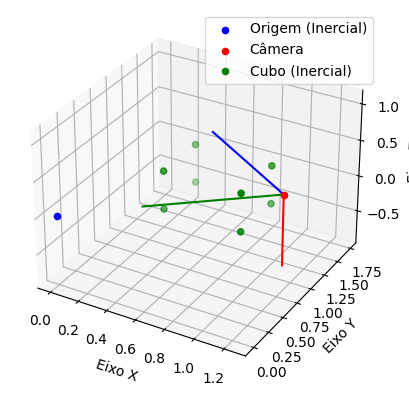

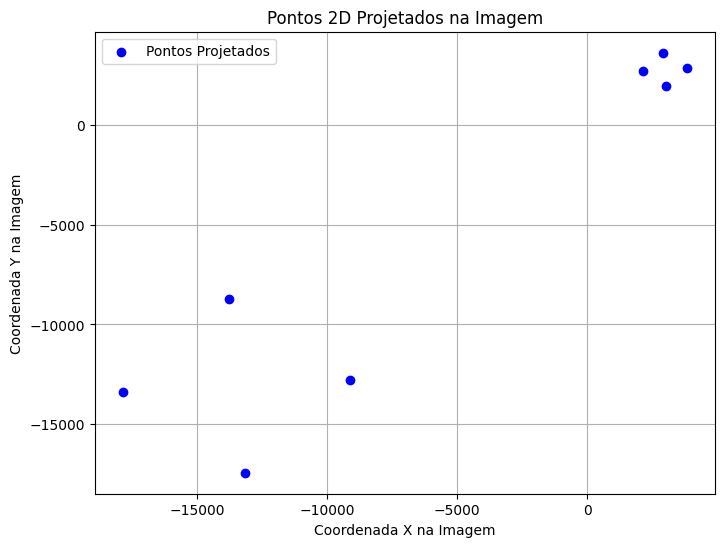

In [96]:
import numpy as np
import matplotlib.pyplot as plt

def plot_camera_and_cube(R_camera, t_camera, L, R_cube, t_cube):
    # Coordenadas dos eixos da câmera
    camera_axes = np.array([[0, 0, 0],
                            [1, 0, 0],
                            [0, 1, 0],
                            [0, 0, 1]])

    # Aplicar a transformação da câmera para obter as novas coordenadas dos eixos
    transformed_axes = np.dot(R_camera, camera_axes.T).T + t_camera

    # Gerar os pontos do cubo
    vertices = generate_cube_points(L)

    # Aplicar a transformação do cubo para obter os novos pontos
    cube_vertices = np.dot(R_cube, np.array(vertices).T).T + t_cube

    # Criar a figura
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotar a origem do sistema de coordenadas inercial
    ax.scatter(0, 0, 0, c='b', marker='o', label='Origem (Inercial)')

    # Plotar as coordenadas da câmera
    ax.scatter(t_camera[0], t_camera[1], t_camera[2], c='r', marker='o', label='Câmera')

    # Plotar os eixos da câmera
    for i in range(1, 4):
        ax.plot([t_camera[0], transformed_axes[i, 0]],
                [t_camera[1], transformed_axes[i, 1]],
                [t_camera[2], transformed_axes[i, 2],], c=['r', 'g', 'b'][i-1])

    # Plotar os pontos do cubo
    ax.scatter(cube_vertices[:, 0], cube_vertices[:, 1], cube_vertices[:, 2], c='g', marker='o', label='Cubo (Inercial)')

    # Configurar os rótulos dos eixos
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.set_zlabel('Eixo Z')

    # Configurar a legenda
    ax.legend()

    # Mostrar o gráfico
    plt.show()

# Função para gerar pontos de um cubo
def generate_cube_points(L):
    vertices = []
    for i in [-1, 1]:
        for j in [-1, 1]:
            for k in [-1, 1]:
                vertex = np.array([i * L / 2, j * L / 2, k * L / 2])
                vertices.append(vertex)
    return vertices

# Exemplo de uso da função para plotar câmera e cubo
L = 0.5
R_camera = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1]])
t_camera = np.array([2, 3, 1])

# Parâmetros de rotação e translação do cubo
R_cube = np.array([[1, 0, 0],
                   [0, 0, -1],
                   [0, 1, 0]])
t_cube = np.array([1, 0.24, 0.8])

plot_camera_and_cube(R, t, L, R_cube, t_cube)

vertices = generate_cube_points(L)

vertices = np.array(vertices)

cube_image_points = cv2.projectPoints(vertices, R, t, k_matrix, None)[0]

cube_image_points = cube_image_points.reshape(-1,2)

plot_image_points(cube_image_points)


In [102]:
import numpy as np
from scipy.linalg import rq

def extract_camera_parameters(projection_matrix):
    # Decompor a matriz de projeção em RQ (decomposição de R e Q)
    K, RT = rq(projection_matrix, mode='full')
    
    # Certificar-se de que a diagonal da matriz intrínseca K seja positiva
    if K[0, 0] < 0:
        K = -K
        RT = -RT

    # Extrair a matriz de rotação R
    R = RT[:3, :3]

    # Extrair o vetor de translação t
    t = RT[:3, 3]

    return K[:, 1:], R, t

# Exemplo de uso da função
projection_matrix = np.array([[0.5377, 0.3188, 0.1448, 1.7920],
                             [0.8334, 0.7269, 0.7434, 0.5377],
                             [0.9920, 0.4314, 0.6555, 0.2412]])

K, R, t = extract_camera_parameters(projection_matrix)

print("Matriz Intrínseca (K):")
print(K)

print("\nMatriz de Rotação (R):")
print(R)

print("\nVetor de Translação (t):")
print(t)


Matriz Intrínseca (K):
[[ 1.26953355  1.07030463 -0.93043987]
 [ 0.          0.44963089 -1.36474763]
 [ 0.          0.         -1.28764422]]

Matriz de Rotação (R):
[[ 0.31585388  0.52724529 -0.77875669]
 [ 0.26767284 -0.50006191 -0.35025682]
 [-0.48484301  0.5997542   0.10819771]]

Vetor de Translação (t):
[-0.12564535  0.74539218  0.62730806]


In [108]:
from scipy.linalg import svd

def calibrate_camera(world_points, image_points):
    """
    Função para encontrar a matriz de câmera C usando o algoritmo DLT.
    
    Args: 
        world_points: Array de pontos 3D na cena.
        image_points: Array de pontos 2D projetados na imagem.

    Return: 
        C_matrix: numpy array contendo a matriz de câmera estimada. 
    """

    if len(world_points) != len(image_points): 
        raise ValueError("Must be the same number of World points and Image points")
    
    if len(world_points) < 6 | len(image_points) < 6 :
        raise ValueError("Must have a minimum of 6 points to compute the camera matrix")


    Q = []
    for i in range(len(world_points)):
        X, Y, Z = world_points[i]
        u,v  = image_points[i]
        Q.append([X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u])
        Q.append([0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v])

    Q = np.array(Q)
    #print(Q)

    # Resolva o sistema de equações usando SVD
    _, _, V = svd(Q)
    c = V[-1, :12]
    #print(c)

    # Reconstrua a matriz de projeção da câmera
    C_matrix = c.reshape(3, 4)
    print(C_matrix)

    return C_matrix

camera_matrix = calibrate_camera(vertices,cube_image_points)

K, R_calib, t_calib = extract_camera_parameters(camera_matrix)

print("Matriz Intrínseca (K):")
print(K)

print("\nMatriz de Rotação (R):")
print(R_calib)

print("\nVetor de Translação (t):")
print(t_calib)


[[ 1.46513726e-01  3.00380165e-01  3.45547852e-01 -5.35041583e-01]
 [ 1.09885294e-01  3.45547852e-01 -3.00380165e-01 -5.10809276e-01]
 [ 4.57855393e-04  4.68375339e-17  3.12250226e-17 -7.75116570e-05]]
Matriz Intrínseca (K):
[[-5.73426075e-01  3.65927875e-01  2.33766240e-01]
 [ 0.00000000e+00  6.67194751e-01  1.93606871e-01]
 [ 0.00000000e+00  0.00000000e+00  4.64370130e-04]]

Matriz de Rotação (R):
[[ 0.09145961  0.83330078  0.07335125]
 [ 0.06896257 -0.19333251 -0.88990297]
 [-0.12141197  0.51791153 -0.45021362]]

Vetor de Translação (t):
[ 0.54024489  0.40735662 -0.71717116]


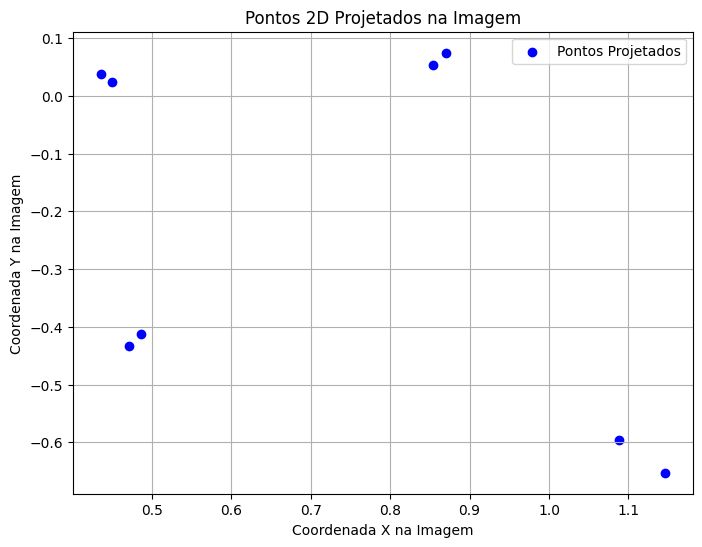

In [117]:
reprojected_cube_image_points = cv2.projectPoints(vertices, R_calib, t_calib, K, None)[0]

reprojected_cube_image_points = reprojected_cube_image_points.reshape(-1,2)

plot_image_points(reprojected_cube_image_points)

In [118]:
def calculate_reprojection_error(original_points, projected_points):
    """
    Calcula o erro de reprojeção entre os pontos da imagem original e os pontos da imagem projetada.

    :param original_points: Pontos 2D observados nas imagens originais.
    :param projected_points: Pontos 2D projetados a partir da projeção dos pontos 3D.
    :return: Erro de reprojeção médio.
    """
    # Verifica se o número de pontos nas duas listas é o mesmo
    if len(original_points) != len(projected_points):
        raise ValueError("O número de pontos nas listas não corresponde.")

    # Calcula a diferença entre os pontos originais e os pontos projetados
    errors = original_points - projected_points

    # Calcula o erro de reprojeção médio (norma média dos erros)
    mean_reprojection_error = np.mean(np.linalg.norm(errors, axis=1))

    return mean_reprojection_error


error = calculate_reprojection_error(cube_image_points,reprojected_cube_image_points)
print(error)



11591.598985759516


[[-3.57950531e-02 -6.79755339e-01  4.81168878e-02 -2.11438624e-01]
 [-2.70965905e-02  4.69714997e-02  6.79021694e-01 -1.60057475e-01]
 [ 8.26103630e-05 -3.52394077e-04  3.06331498e-04  4.87973057e-04]]


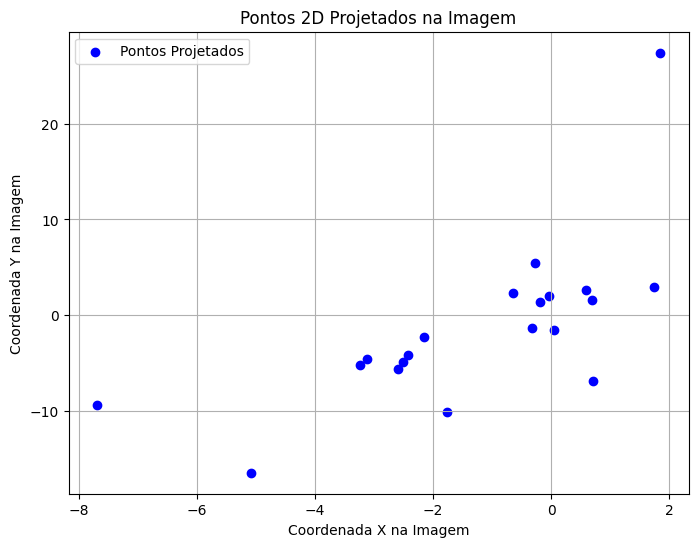

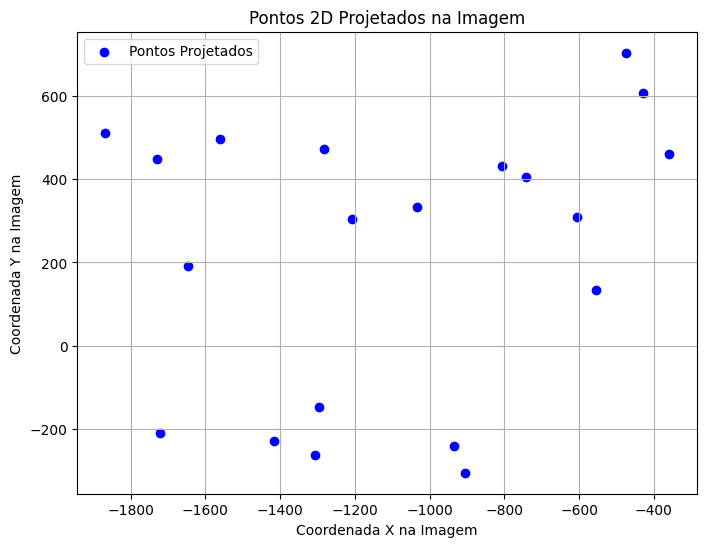

1181.7932506287366


In [142]:
camera_matrix_2 = calibrate_camera(world_points_2,image_points_2)

K2, R2, t2 = extract_camera_parameters(camera_matrix_2)

reprojected_image_points_2 = cv2.projectPoints(world_points_2, R2, t2, K2, None)[0]

reprojected_image_points_2 = reprojected_image_points_2.reshape(-1,2)

plot_image_points(reprojected_image_points_2)
plot_image_points(image_points_2)

error = calculate_reprojection_error(image_points_2,reprojected_image_points_2)

print(error)